In [70]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
plt.rcParams["figure.figsize"] = (12,8)

In [71]:
# Generate clusters
x, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  random_state=0)

In [72]:
def plot_cluster(x_data, y_pred, plot_centroids=False):
    x_centroids = []
    y_centroids = []

    for cluster in set(y_pred):
        x = x_data[y_pred == cluster, 0]
        y = x_data[y_pred == cluster, 1]
        x_centroids.append(np.mean(x))
        y_centroids.append(np.mean(y))

        plt.scatter(x, y, marker='o', label=f'Cluster {cluster}')

    if plot_centroids:
        plt.scatter(x_centroids, y_centroids, marker='*', s=250, label='Centroid')

    plt.legend()
    plt.grid()
    plt.show()

In [73]:
#  algo
agg_cluster = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 3)

In [74]:
y_hc = agg_cluster.fit_predict(x)

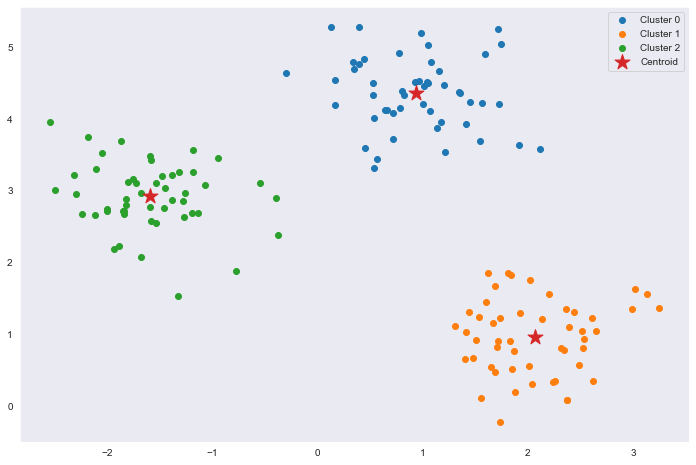

In [75]:
plot_cluster(x, y_hc, True)

In [76]:
def plot_dendrogram(x, method='ward'):
    dendrogram = sch.dendrogram(sch.linkage(x, method=method), truncate_mode='level', p=4)
    plt.title('Dendrogram')
    plt.ylabel('Euclidean Distances')
    plt.xlabel('Points')
    plt.show()

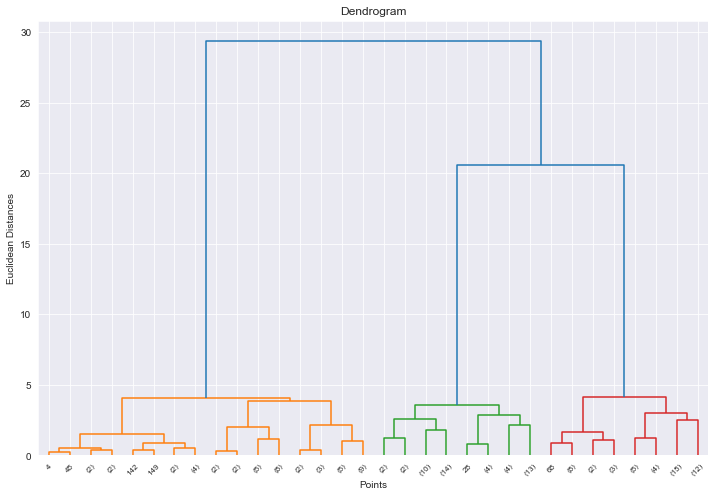

In [77]:
plot_dendrogram(x)